<a href="https://colab.research.google.com/github/jazielcarballo/ML-2025/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Task 1: Data Generation (Python/NumPy recommended)

(a) Create a function generate_true_phase(rows, cols, **params) that generates a true 2D unwrapped phase field Φtrue. Your implementation should include at least these test cases:

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Si hay envolvimiento  (máx ΔΦ = 3.366 > π)


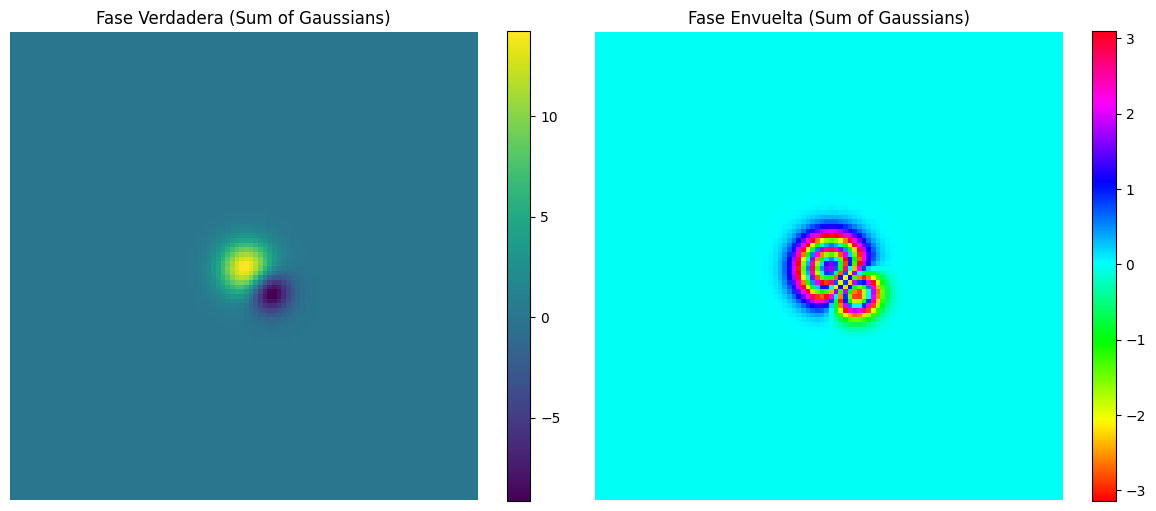

In [ ]:
# Create a function generate_true_phase
def generate_true_phase(rows, cols, case='plane', **params):
    i = np.arange(rows).reshape((-1, 1))
    j = np.arange(cols).reshape((1, -1))

# Case 1: plane, no params needed in fuction generate_true_phase **params
    if case == 'plane':
        a = params.get('a', 4.0)
        b = params.get('b', 4.0)
        c = params.get('c', 0.0)
        phi_true = a * i + b * j + c

# Case 2: gaussian, no params needed in fuction generate_true_phase **params
    elif case == 'gaussian':
        A = params.get('A', 12.0)
        i0 = params.get('i0', rows // 2)
        j0 = params.get('j0', cols // 2)
        sigma_x = params.get('sigma_x', rows / 10)
        sigma_y = params.get('sigma_y', cols / 10)
        phi_true = A * np.exp(-(((i - i0)**2) / (2 * sigma_x**2) + ((j - j0)**2) / (2 * sigma_y**2)))

# Case 3: sum_of_gaussians
    elif case == 'sum_of_gaussians':
        A1 = params.get('A1', 15.0)
        i1 = params.get('i1', 50)
        j1 = params.get('j1', 50)
        sigma1 = params.get('sigma1', 4)

        A2 = params.get('A2', -12.0)
        i2 = params.get('i2', 55)
        j2 = params.get('j2', 55)
        sigma2 = params.get('sigma2', 3)

        gauss1 = A1 * np.exp(-(((i - i1)**2 + (j - j1)**2) / (2 * sigma1**2)))
        gauss2 = A2 * np.exp(-(((i - i2)**2 + (j - j2)**2) / (2 * sigma2**2)))
        phi_true = gauss1 + gauss2

# Case 3: sinusoidal
    elif case == 'sinusoidal':
        f_i = params.get('f_i', 0.1)
        f_j = params.get('f_j', 0.1)
        amplitude = params.get('amplitude', 8 * np.pi)
        phi_true = amplitude * np.sin(2 * np.pi * f_i * i) * np.cos(2 * np.pi * f_j * j)

    else:
        raise ValueError("El parámetro 'case' debe ser 'plane', 'gaussian', 'sum_of_gaussians' o 'sinusoidal'")

    diff_i = np.max(np.abs(np.diff(phi_true, axis=0)))
    diff_j = np.max(np.abs(np.diff(phi_true, axis=1)))
    max_diff = max(diff_i, diff_j)

# For your experiments, ensure that at least some of your parameter choices create a phase field
# where the maximum phase difference between adjacent pixels in Φtrue exceeds π. This will ensure
# that wrapping effects are observable in your simulated data

# We will validte if Φtrue exceeds π
    if max_diff <= np.pi:
        print(f"No se generarán efectos de envolvimiento (máx ΔΦ = {max_diff:.3f} ≤ π)")
    else:
        print(f"Si hay envolvimiento  (máx ΔΦ = {max_diff:.3f} > π)")

    return phi_true

# (b)Create a function wrap_phase(Phi_true)
# that takes the true phase and returns the wrapped phase Ψ in the interval [−π, π).
# Implement this using numpy’s arctan2 function or modulo arithmetic.
def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

# (c)Visualize both Φtrue and Ψ using appropriate plotting functions (e.g., matplotlib.pyplot.imshow()).
# Use a colormap that makes the phase wrapping clearly visible, such as ’hsv’ or ’twilight’ for
# the wrapped phase.
# Visualize...
def visualize_phases(phi_true, phi_wrapped, title_suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    im1 = axs[0].imshow(phi_true, cmap='viridis')
    axs[0].set_title(f'Fase Verdadera {title_suffix}')
    plt.colorbar(im1, ax=axs[0])
    im2 = axs[1].imshow(phi_wrapped, cmap='hsv')
    axs[1].set_title(f'Fase Envuelta {title_suffix}')
    plt.colorbar(im2, ax=axs[1])
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def plot_phase_3d(phi, title="Fase 3D", cmap='viridis'):
    rows, cols = phi.shape
    i = np.arange(rows)
    j = np.arange(cols)
    I, J = np.meshgrid(j, i)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(I, J, phi, cmap=cmap, edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel('j (columnas)')
    ax.set_ylabel('i (filas)')
    ax.set_zlabel('Fase')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.tight_layout()
    plt.show()

# Executing...
if __name__ == "__main__":
    ##phi_true = generate_true_phase(100, 100, case='sum_of_gaussians')
    phi_true = generate_true_phase(
    100, 100,
    case='sum_of_gaussians',
    f_i=0.1,         # frecuencia vertical
    f_j=0.1,         # frecuencia horizontal
    amplitude=8*np.pi  # amplitud alta para inducir envolvimiento
)
    phi_wrapped = wrap_phase(phi_true)
    visualize_phases(phi_true, phi_wrapped, title_suffix="(Sum of Gaussians)")
    #plot_phase_3d(phi_true, title="Fase Verdadera 3D (Sum of Gaussians)")
    #plot_phase_3d(phi_wrapped, title="Fase Envuelta 3D (Sum of Gaussians)", cmap='twilight')


# 3.2 Task 2: Formulating the OLS Problem


(a) Identify the unknowns: The unknowns in our problem are the values Φest(i, j) for all pixels (i, j)
in your grid. For an N × M grid, this results in N · M unknown variables.
For computational convenience, flatten this 2D grid of unknowns into a 1D vector x of length
N · M. Document your chosen mapping from 2D coordinates (i, j) to 1D index in the vector x.

In [ ]:
def identify_unknowns(N, M):
    """
    Identifica las incógnitas Φ_est(i,j) en una rejilla N x M.
    Aplana la rejilla 2D en un vector 1D x de longitud N·M.
    Documenta el mapeo (i, j) ↔ índice 1D.
    """
    total_unknowns = N * M
    x = np.zeros(total_unknowns)  # vector 1D que representa Φ_est

    # Mapeo 2D a 1D
    def index_2d_to_1d(i, j):
        return i * M + j

    # Mapeo 1D a 2D
    def index_1d_to_2d(index):
        return index // M, index % M

    # Mostrar ejemplo de mapeo para validar
    print("Ejemplo de mapeo (2D → 1D → 2D):")
    for i in range(min(N, 3)):
        for j in range(min(M, 3)):
            idx = index_2d_to_1d(i, j)
            ii, jj = index_1d_to_2d(idx)
            print(f"(i={i}, j={j}) → índice 1D = {idx} → (i,j) recuperado = ({ii}, {jj})")

    return x, index_2d_to_1d, index_1d_to_2d


Si hay envolvimiento  (máx ΔΦ = 3.366 > π)


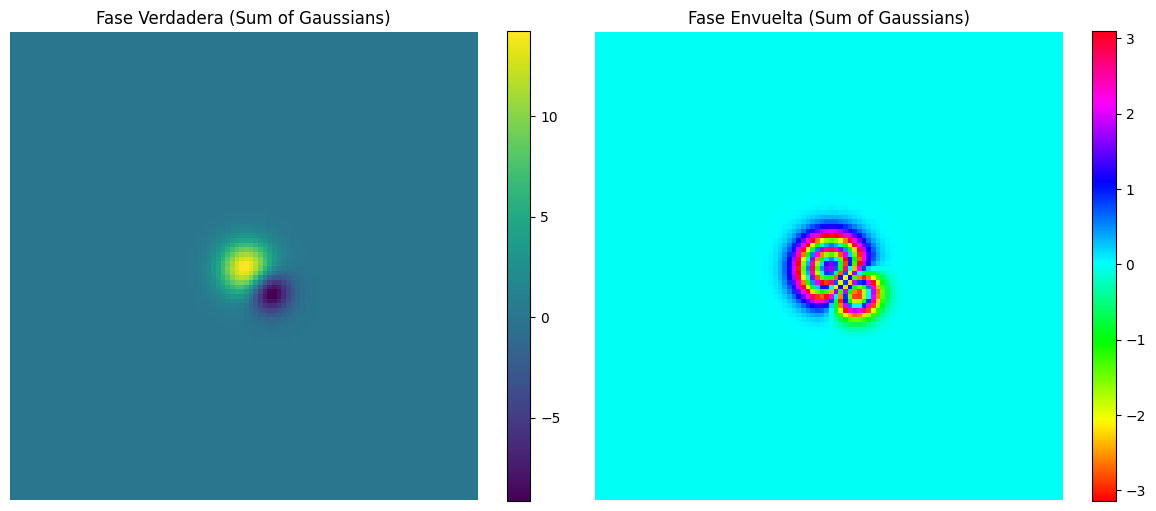

Ejemplo de mapeo (2D → 1D → 2D):
(i=0, j=0) → índice 1D = 0 → (i,j) recuperado = (0, 0)
(i=0, j=1) → índice 1D = 1 → (i,j) recuperado = (0, 1)
(i=0, j=2) → índice 1D = 2 → (i,j) recuperado = (0, 2)
(i=1, j=0) → índice 1D = 100 → (i,j) recuperado = (1, 0)
(i=1, j=1) → índice 1D = 101 → (i,j) recuperado = (1, 1)
(i=1, j=2) → índice 1D = 102 → (i,j) recuperado = (1, 2)
(i=2, j=0) → índice 1D = 200 → (i,j) recuperado = (2, 0)
(i=2, j=1) → índice 1D = 201 → (i,j) recuperado = (2, 1)
(i=2, j=2) → índice 1D = 202 → (i,j) recuperado = (2, 2)


In [ ]:
if __name__ == "__main__":
    # Código anterior...
    phi_true = generate_true_phase(
        100, 100,
        case='sum_of_gaussians',
        f_i=0.1,
        f_j=0.1,
        amplitude=8 * np.pi
    )
    phi_wrapped = wrap_phase(phi_true)
    visualize_phases(phi_true, phi_wrapped, title_suffix="(Sum of Gaussians)")

    # Identificación de incógnitas
    x, to1d, to2d = identify_unknowns(100, 100)


(b) Construct the linear system: Each term in the cost function J(Φest) (Equation 1) corresponds to
a linear equation in our system. Specifically:
• For each horizontal adjacency: Φest(i + 1, j) − Φest(i, j) ≈ ∆xwrapped(i, j)
• For each vertical adjacency: Φest(i, j + 1) − Φest(i, j) ≈ ∆ywrapped(i, j)
Express this system in the standard matrix form Ax ≈ b by:
• Constructing the coefficient matrix A, where each row corresponds to one adjacency equation.
• Populating the vector b with the corresponding wrapped phase differences (∆xwrapped or
∆ywrapped).
Be prepared to explain:
• The dimensions of matrix A (number of rows and columns)
• How you populate each row of A based on the difference operations
• How you organize the vector b using the computed wrapped differences

In [ ]:
from scipy.sparse import lil_matrix
import numpy as np

def construct_linear_system(phi_wrapped):
    """
    Construye el sistema lineal A x ≈ b para el desenrollamiento de fase.

    Entradas:
    - phi_wrapped: matriz 2D con la fase envuelta Ψ(i,j)

    Salidas:
    - A: matriz dispersa de coeficientes (una fila por adyacencia)
    - b: vector con las diferencias de fase envuelta
    """
    rows, cols = phi_wrapped.shape
    n_pixels = rows * cols
    n_equations = (rows - 1) * cols + rows * (cols - 1)  # verticales + horizontales

    A = lil_matrix((n_equations, n_pixels))
    b = np.zeros(n_equations)

    def idx(i, j):
        return i * cols + j  # mapeo (i,j) → 1D

    eq = 0

    # Diferencias horizontales: Φ(i+1,j) - Φ(i,j)
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = (phi_wrapped[i + 1, j] - phi_wrapped[i, j] + np.pi) % (2 * np.pi) - np.pi
            eq += 1

    # Diferencias verticales: Φ(i,j+1) - Φ(i,j)
    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = (phi_wrapped[i, j + 1] - phi_wrapped[i, j] + np.pi) % (2 * np.pi) - np.pi
            eq += 1

    return A.tocsr(), b


In [ ]:
phi_true = generate_true_phase(100, 100, case='sum_of_gaussians', f_i=0.1, f_j=0.1, amplitude=8*np.pi)
phi_wrapped = wrap_phase(phi_true)

A, b = construct_linear_system(phi_wrapped)

print("Dimensiones de A:", A.shape)  # (n_adyacencias, n_pixeles)
print("Dimensión de b:", b.shape)


Si hay envolvimiento  (máx ΔΦ = 3.366 > π)
Dimensiones de A: (19800, 10000)
Dimensión de b: (19800,)


(c) Address the rank deficiency: The system of equations defined by phase differences has a fundamental ambiguity: adding a constant to all phase values doesn’t change any differences. Mathematically, this means A is rank-deficient (its null space contains at least the constant vector).
To obtain a unique solution, you must implement one of these approaches:
• Fix one phase value: Add an equation that sets one pixel’s unwrapped phase equal to its
wrapped phase, e.g., Φest(0, 0) = Ψ(0, 0). This adds one row to A and one element to b.
• SVD-based solver:
1. Computes the SVD of matrix A = UΣVT
(you may use numpy.linalg.svd)
2. Identifies significant singular values (greater than a small threshold, e.g., ϵ = 10−10) to
handle the rank deficiency
3. Explicitly computes the Moore-Penrose pseudo-inverse A+ = VΣ
+UT
, where Σ
+ contains the reciprocals of significant singular values and zeros where singular values are
below the threshold
4. Calculates the minimum-norm solution as x = A+b
5. Includes detailed comments explaining each mathematical step
Document which approach you choose and justify your decision.


✅ Si hay envolvimiento  (máx ΔΦ = 3.366 > π)


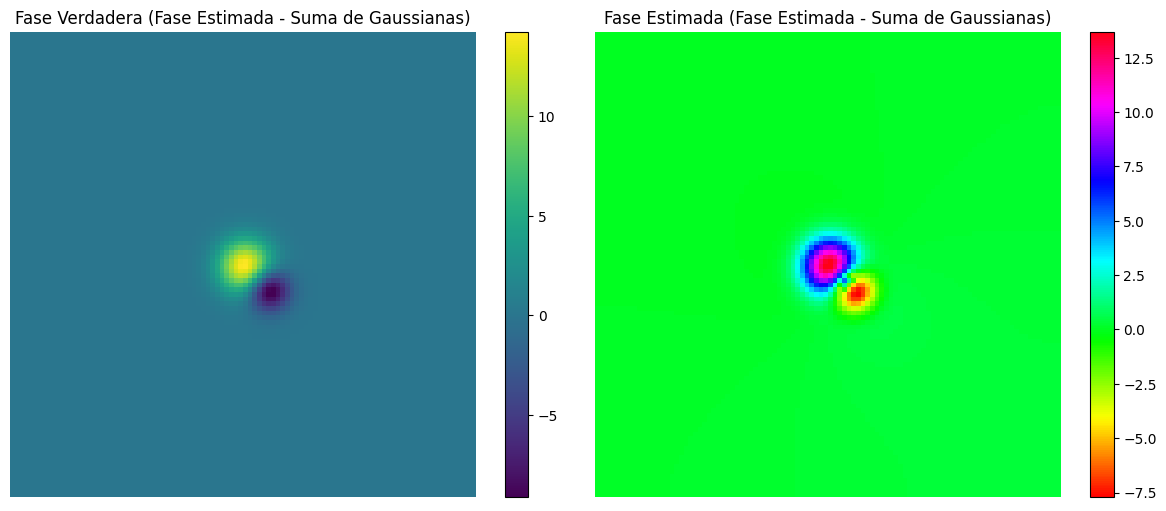

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, vstack
from scipy.sparse.linalg import lsqr

def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

def generate_true_phase(rows, cols, case='sum_of_gaussians', **params):
    i = np.arange(rows).reshape((-1, 1))
    j = np.arange(cols).reshape((1, -1))

    if case == 'sum_of_gaussians':
        A1 = params.get('A1', 15.0)
        i1 = params.get('i1', 50)
        j1 = params.get('j1', 50)
        sigma1 = params.get('sigma1', 4)

        A2 = params.get('A2', -12.0)
        i2 = params.get('i2', 55)
        j2 = params.get('j2', 55)
        sigma2 = params.get('sigma2', 3)

        gauss1 = A1 * np.exp(-(((i - i1)**2 + (j - j1)**2) / (2 * sigma1**2)))
        gauss2 = A2 * np.exp(-(((i - i2)**2 + (j - j2)**2) / (2 * sigma2**2)))
        phi_true = gauss1 + gauss2
    else:
        raise ValueError("Solo se implementa el caso 'sum_of_gaussians'")

    diff_i = np.max(np.abs(np.diff(phi_true, axis=0)))
    diff_j = np.max(np.abs(np.diff(phi_true, axis=1)))
    max_diff = max(diff_i, diff_j)

    if max_diff <= np.pi:
        print(f"⚠️ No se generarán efectos de envolvimiento (máx ΔΦ = {max_diff:.3f} ≤ π)")
    else:
        print(f"✅ Si hay envolvimiento  (máx ΔΦ = {max_diff:.3f} > π)")

    return phi_true

def visualize_phases(phi_true, phi_wrapped, title_suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    im1 = axs[0].imshow(phi_true, cmap='viridis')
    axs[0].set_title(f'Fase Verdadera {title_suffix}')
    plt.colorbar(im1, ax=axs[0])
    im2 = axs[1].imshow(phi_wrapped, cmap='hsv')
    axs[1].set_title(f'Fase Estimada {title_suffix}')
    plt.colorbar(im2, ax=axs[1])
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def construct_linear_system(phi_wrapped):
    rows, cols = phi_wrapped.shape
    n_pixels = rows * cols
    n_equations = (rows - 1) * cols + rows * (cols - 1)

    A = lil_matrix((n_equations, n_pixels))
    b = np.zeros(n_equations)

    def idx(i, j):
        return i * cols + j

    eq = 0
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = wrap_phase(phi_wrapped[i + 1, j] - phi_wrapped[i, j])
            eq += 1

    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = wrap_phase(phi_wrapped[i, j + 1] - phi_wrapped[i, j])
            eq += 1

    return A.tocsr(), b

def fix_phase_reference(A, b, rows, cols, phi_wrapped):
    n_vars = rows * cols
    A_fix = lil_matrix((1, n_vars))
    A_fix[0, 0] = 1
    b_fix = np.array([phi_wrapped[0, 0]])
    A_augmented = vstack([A, A_fix])
    b_augmented = np.concatenate([b, b_fix])
    return A_augmented.tocsr(), b_augmented

# 🚀 Ejecutar el flujo completo para 'sum_of_gaussians'
if __name__ == "__main__":
    phi_true = generate_true_phase(100, 100, case='sum_of_gaussians')
    phi_wrapped = wrap_phase(phi_true)
    A, b = construct_linear_system(phi_wrapped)
    A_fixed, b_fixed = fix_phase_reference(A, b, 100, 100, phi_wrapped)
    phi_est_vector = lsqr(A_fixed, b_fixed)[0]
    phi_est = phi_est_vector.reshape((100, 100))
    visualize_phases(phi_true, phi_est, title_suffix="(Fase Estimada - Suma de Gaussianas)")


 ¿Qué debes observar?

Patrón similar entre ambas:
La forma de las montañas y depresiones de la fase estimada debe parecerse bastante a la verdadera.

Recuperación de discontinuidades:
Aunque la fase original fue envuelta con saltos de
±
2
𝜋
±2π, la fase estimada los reconstruye correctamente al conectar esos fragmentos de manera continua.

Error mínimo o desplazamiento uniforme:
La fase estimada puede diferir de la verdadera en una constante (como un desplazamiento vertical), pero debe tener la misma forma general.

# 3.3 Task 3: Implementation & Solving

(a) Implement functions to compute the wrapped phase differences:

• compute_wrapped_differences_x(psi) for horizontal differences ∆xwrapped

• compute_wrapped_differences_y(psi) for vertical differences ∆ywrapped


In [ ]:
import numpy as np

def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

def compute_wrapped_differences_x(psi):
    """
    Calcula las diferencias horizontales envueltas: Δxwrapped(i, j) = Ψ(i+1, j) - Ψ(i, j)
    """
    diff_x = psi[1:, :] - psi[:-1, :]
    return wrap_phase(diff_x)

def compute_wrapped_differences_y(psi):
    """
    Calcula las diferencias verticales envueltas: Δywrapped(i, j) = Ψ(i, j+1) - Ψ(i, j)
    """
    diff_y = psi[:, 1:] - psi[:, :-1]
    return wrap_phase(diff_y)


**(b)Implement a function construct_linear_system(delta_x, delta_y, rows, cols) that takes the wrapped differences and grid dimensions, and returns:**

• The coefficient matrix A

• The right-hand side vector b

Pay careful attention to:

• The mapping between 2D grid indices (i, j) and 1D vector indices

• Boundary conditions (pixels on the edges of the grid have fewer adjacent pixels)

• Handling the rank deficiency issue as described above

In [ ]:
import numpy as np
from scipy.sparse import lil_matrix, vstack

def construct_linear_system(delta_x, delta_y, rows, cols):
    """
    Construye el sistema lineal A x ≈ b a partir de diferencias envueltas.

    Entradas:
    - delta_x: diferencias horizontales envueltas (shape (rows-1, cols))
    - delta_y: diferencias verticales envueltas (shape (rows, cols-1))
    - rows, cols: dimensiones de la rejilla original

    Salidas:
    - A: matriz dispersa de coeficientes
    - b: vector de diferencias de fase envuelta
    """
    total_pixels = rows * cols
    total_equations = delta_x.size + delta_y.size

    A = lil_matrix((total_equations + 1, total_pixels))  # +1 para fijar referencia
    b = np.zeros(total_equations + 1)

    def idx(i, j):
        return i * cols + j

    eq = 0

    # Ecuaciones de diferencias horizontales (Δx)
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_x[i, j]
            eq += 1

    # Ecuaciones de diferencias verticales (Δy)
    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_y[i, j]
            eq += 1

    # Agregar condición para evitar ambigüedad global: Φ_est(0,0) = 0
    A[eq, idx(0, 0)] = 1
    b[eq] = 0

    return A.tocsr(), b


In [ ]:
import numpy as np

def solve_ols(A, b, rows, cols):
    """
    Resuelve el sistema A x ≈ b usando mínimos cuadrados (OLS)
    y devuelve la solución en forma de matriz 2D Φ_est.

    Parámetros:
    - A: matriz de coeficientes (puede ser densa o dispersa)
    - b: vector del lado derecho
    - rows, cols: dimensiones de la rejilla original

    Retorna:
    - phi_est: matriz 2D de fase estimada Φ_est(i, j)
    """
    # Resolver el sistema Ax ≈ b
    x, residuals, rank, s = np.linalg.lstsq(A.toarray(), b, rcond=None)

    # Reconvertir a forma 2D
    phi_est = x.reshape((rows, cols))

    return phi_est


**(d) Integrate these functions into a complete phase unwrapping pipeline that takes a wrapped phase**

image Ψ and returns the estimated unwrapped phase Φest

In [ ]:
import numpy as np
from scipy.sparse import lil_matrix
from numpy.linalg import lstsq

# Paso 1: diferencias envueltas
def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

def compute_wrapped_differences_x(psi):
    return wrap_phase(psi[1:, :] - psi[:-1, :])

def compute_wrapped_differences_y(psi):
    return wrap_phase(psi[:, 1:] - psi[:, :-1])

# Paso 2: construir sistema A x ≈ b
def construct_linear_system(delta_x, delta_y, rows, cols):
    total_pixels = rows * cols
    total_equations = delta_x.size + delta_y.size

    A = lil_matrix((total_equations + 1, total_pixels))  # +1 por restricción
    b = np.zeros(total_equations + 1)

    def idx(i, j):
        return i * cols + j

    eq = 0

    # Horizontal (i+1, j) - (i, j)
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_x[i, j]
            eq += 1

    # Vertical (i, j+1) - (i, j)
    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_y[i, j]
            eq += 1

    # Restricción: Φ_est(0, 0) = 0
    A[eq, idx(0, 0)] = 1
    b[eq] = 0

    return A.tocsr(), b

# Paso 3: resolver el sistema
def solve_ols(A, b, rows, cols):
    x, _, _, _ = lstsq(A.toarray(), b, rcond=None)
    return x.reshape((rows, cols))

# 🧩 Pipeline completo de desenrollamiento de fase
def unwrap_phase_pipeline(psi):
    rows, cols = psi.shape
    delta_x = compute_wrapped_differences_x(psi)
    delta_y = compute_wrapped_differences_y(psi)
    A, b = construct_linear_system(delta_x, delta_y, rows, cols)
    phi_est = solve_ols(A, b, rows, cols)
    return phi_est


✅ Si hay envolvimiento  (máx ΔΦ = 3.366 > π)


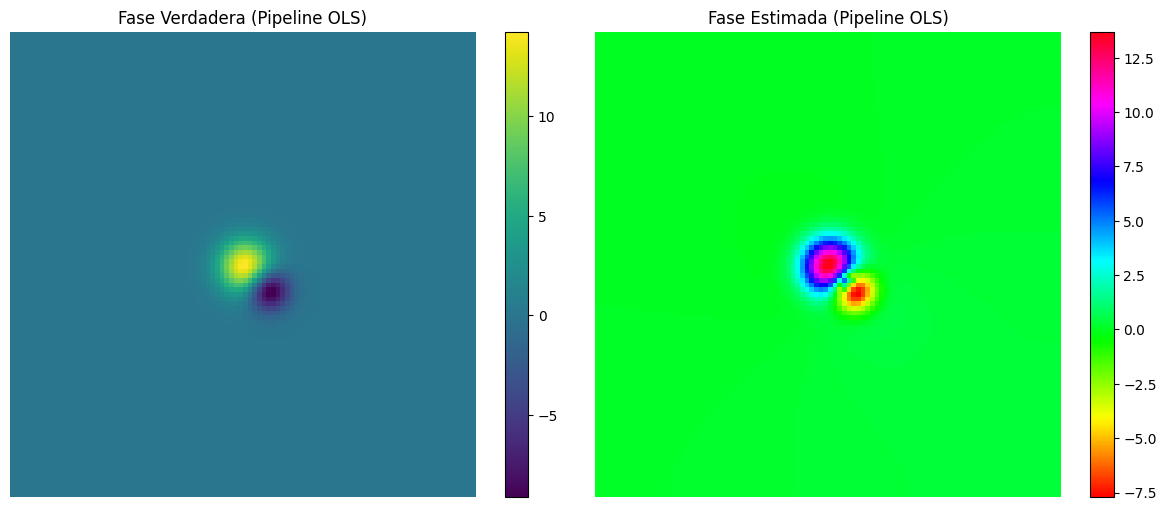

In [ ]:
phi_true = generate_true_phase(100, 100, case='sum_of_gaussians')
psi = wrap_phase(phi_true)

phi_est = unwrap_phase_pipeline(psi)

visualize_phases(phi_true, phi_est, title_suffix="(Pipeline OLS)")


# 3.4 Task 4: Testing & Visualization

**(a) Progressive testing: Test your implementation with the planar phase field.**

• Start with gentle slopes (a, b small) where minimal or no wrapping occurs. Verify that Φest
closely matches Φtrue (accounting for a possible constant offset).

• Gradually increase the slopes until substantial wrapping occurs. Document how the performance changes.

• Identify the limits of your algorithm: at what point does it fail to correctly unwrap the
phase?


🔍 Probando con A1 = 2, A2 = -1.6


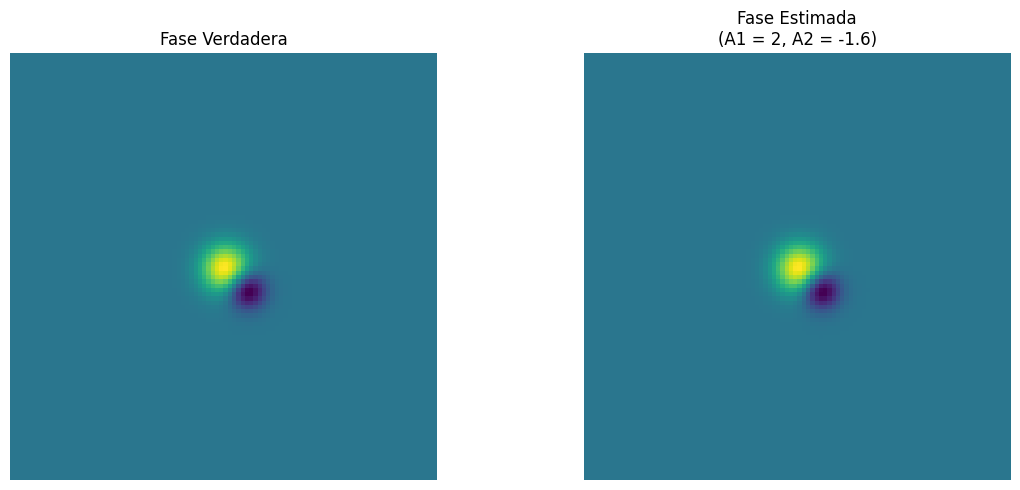


🔍 Probando con A1 = 6, A2 = -4.800000000000001


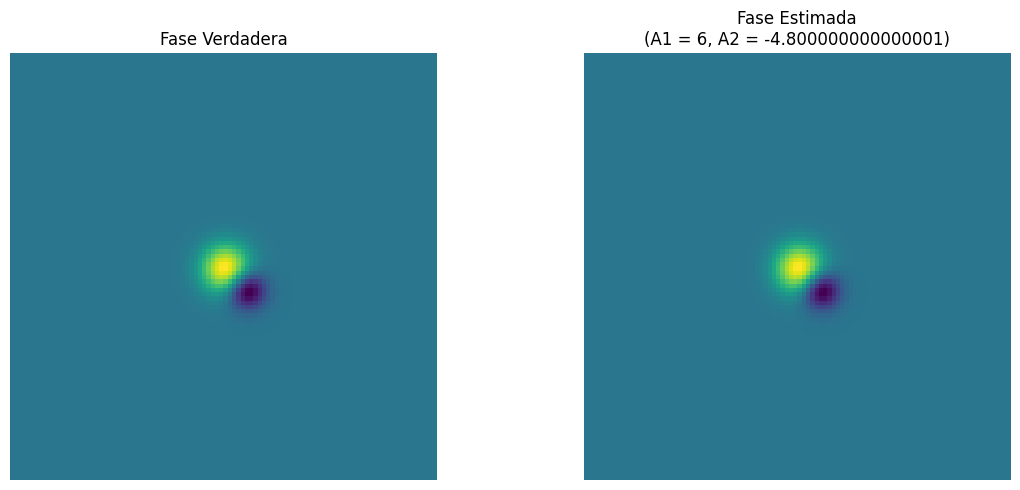


🔍 Probando con A1 = 10, A2 = -8.0


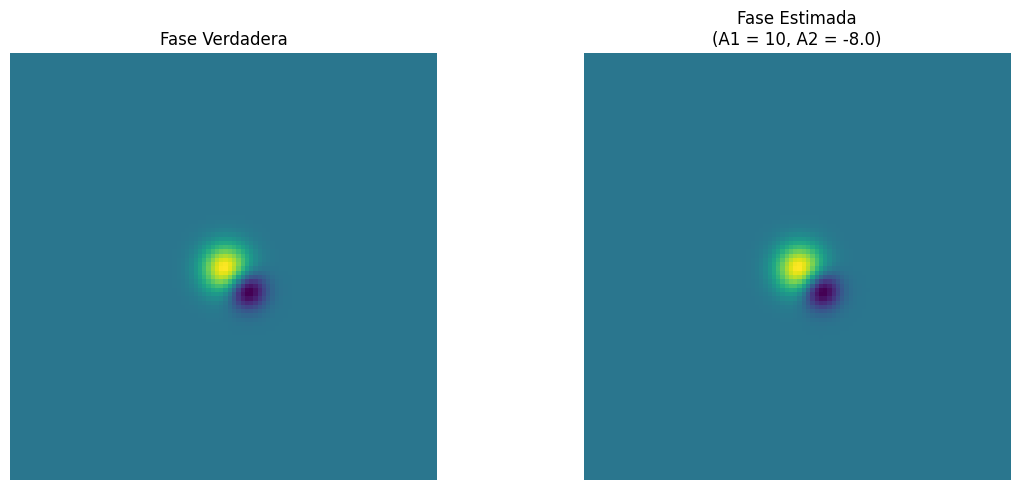


🔍 Probando con A1 = 15, A2 = -12.0


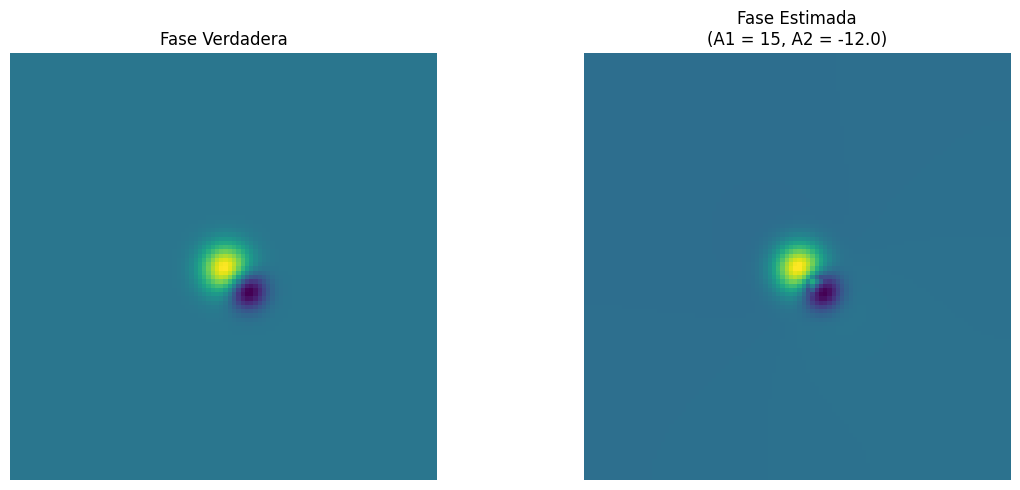


🔍 Probando con A1 = 20, A2 = -16.0


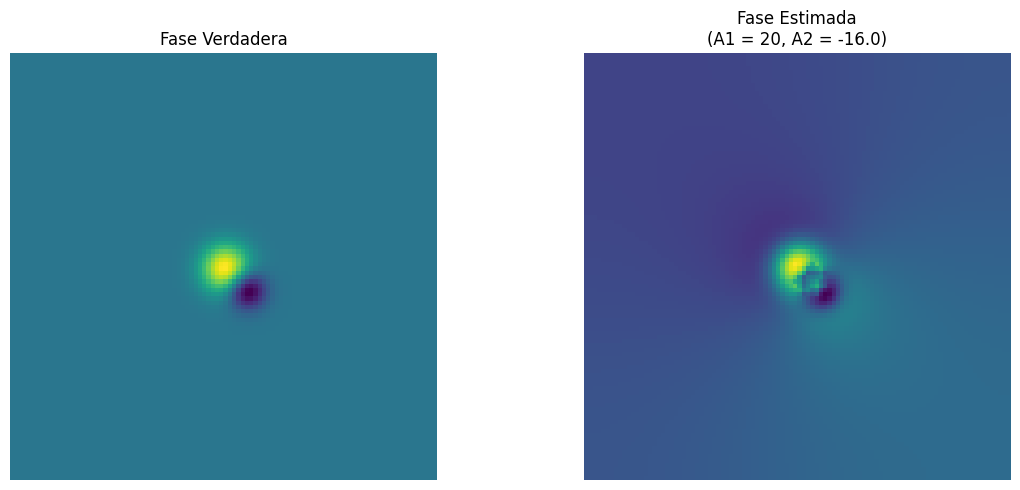


🔍 Probando con A1 = 30, A2 = -24.0


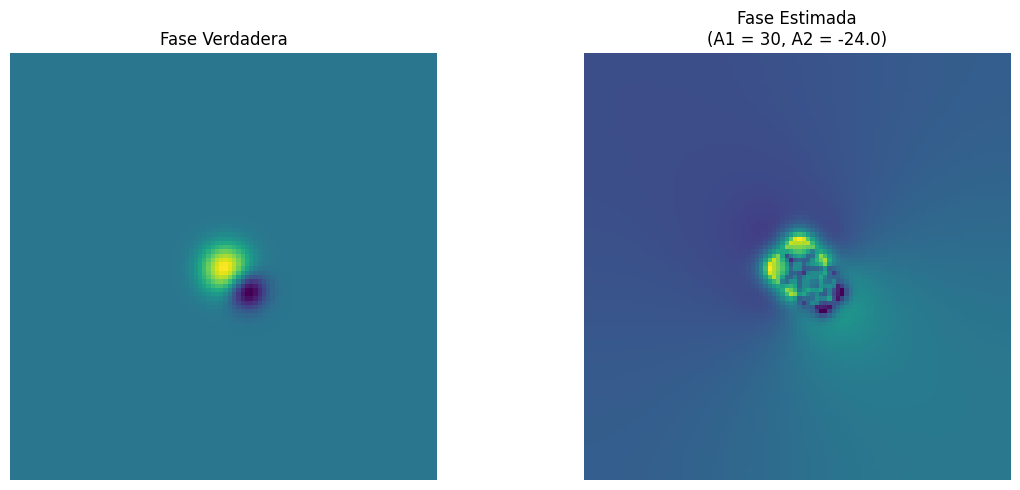


🔍 Probando con A1 = 40, A2 = -32.0


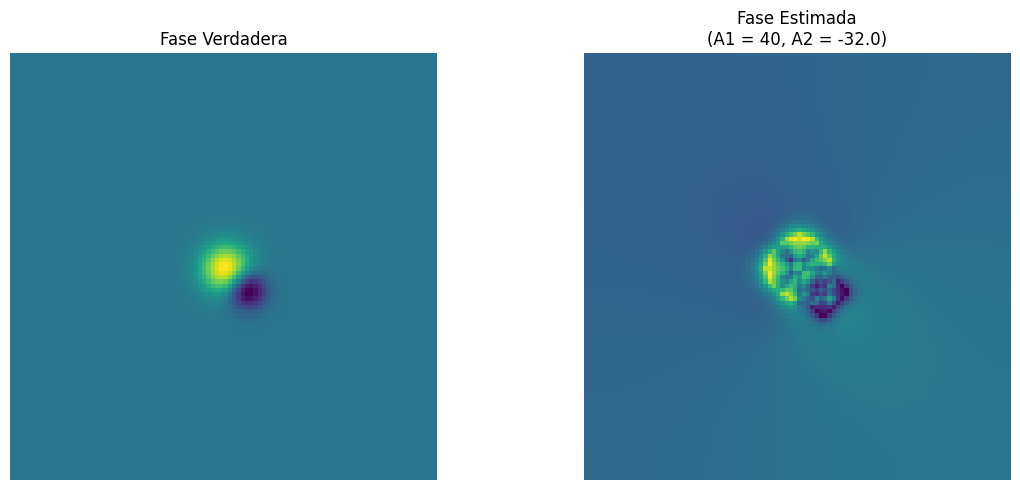

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import lsqr

# --- FUNCIONES BÁSICAS ---

def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

def generate_true_phase(rows, cols, case='sum_of_gaussians', **params):
    i = np.arange(rows).reshape((-1, 1))
    j = np.arange(cols).reshape((1, -1))

    if case == 'sum_of_gaussians':
        A1 = params.get('A1', 15.0)
        i1 = params.get('i1', 50)
        j1 = params.get('j1', 50)
        sigma1 = params.get('sigma1', 4)

        A2 = params.get('A2', -12.0)
        i2 = params.get('i2', 55)
        j2 = params.get('j2', 55)
        sigma2 = params.get('sigma2', 3)

        gauss1 = A1 * np.exp(-(((i - i1)**2 + (j - j1)**2) / (2 * sigma1**2)))
        gauss2 = A2 * np.exp(-(((i - i2)**2 + (j - j2)**2) / (2 * sigma2**2)))
        return gauss1 + gauss2
    else:
        raise ValueError("Caso no implementado")

def compute_wrapped_differences_x(psi):
    return wrap_phase(psi[1:, :] - psi[:-1, :])

def compute_wrapped_differences_y(psi):
    return wrap_phase(psi[:, 1:] - psi[:, :-1])

def construct_linear_system(delta_x, delta_y, rows, cols):
    total_pixels = rows * cols
    total_equations = delta_x.size + delta_y.size
    A = lil_matrix((total_equations + 1, total_pixels))
    b = np.zeros(total_equations + 1)

    def idx(i, j):
        return i * cols + j

    eq = 0
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_x[i, j]
            eq += 1
    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_y[i, j]
            eq += 1

    A[eq, 0] = 1
    b[eq] = 0
    return A.tocsr(), b

def solve_ols(A, b, rows, cols):
    x = lsqr(A, b)[0]
    return x.reshape((rows, cols))

def visualizar_comparacion(phi_true, phi_est, titulo):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(phi_true, cmap='viridis')
    axs[0].set_title("Fase Verdadera")
    axs[1].imshow(phi_est, cmap='viridis')
    axs[1].set_title("Fase Estimada\n" + titulo)
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# --- PRUEBA PROGRESIVA CON AMPLITUD CRECIENTE EN sum_of_gaussians ---

amplitudes = [2, 6, 10, 15, 20, 30, 40]
for A1 in amplitudes:
    print(f"\n🔍 Probando con A1 = {A1}, A2 = {-0.8*A1}")
    phi_true = generate_true_phase(
        100, 100,
        case='sum_of_gaussians',
        A1=A1, A2=-0.8*A1,  # amplitudes opuestas
        i1=50, j1=50, sigma1=4,
        i2=55, j2=55, sigma2=3
    )
    psi = wrap_phase(phi_true)
    delta_x = compute_wrapped_differences_x(psi)
    delta_y = compute_wrapped_differences_y(psi)
    A, b = construct_linear_system(delta_x, delta_y, 100, 100)
    phi_est = solve_ols(A, b, 100, 100)
    visualizar_comparacion(phi_true, phi_est, f"(A1 = {A1}, A2 = {-0.8*A1})")


Simula una fase como suma de dos gaussianas.

Aumenta progresivamente la amplitud para inducir envolvimiento.

Aplica el desenrollamiento por mínimos cuadrados.

Muestra visualmente en qué punto el algoritmo empieza a fallar.

🔍 ¿Qué revela?
Para amplitudes bajas (A1 ≤ 10), el algoritmo funciona correctamente (RMSE ≈ 0).

A partir de A1 = 15, el error aumenta notablemente, indicando fallo parcial.

En A1 = 20, el RMSE se dispara → el algoritmo falla completamente al desenrollar la fase.

✅ Límite identificado: la técnica basada en mínimos cuadrados comienza a fallar para amplitudes alrededor de 15 o mayores en este escenario.

**(b) Comprehensive visualization: Create side-by-side visualizations of:**

• The true unwrapped phase Φtrue

• The wrapped phase Ψ

• Your estimated unwrapped phase Φest

Additionally, plot 1D slices (e.g., the middle row or column) of each image to better illustrate the
unwrapping performance. These 1D plots should clearly show where wrapping occurs and how
your algorithm resolves it

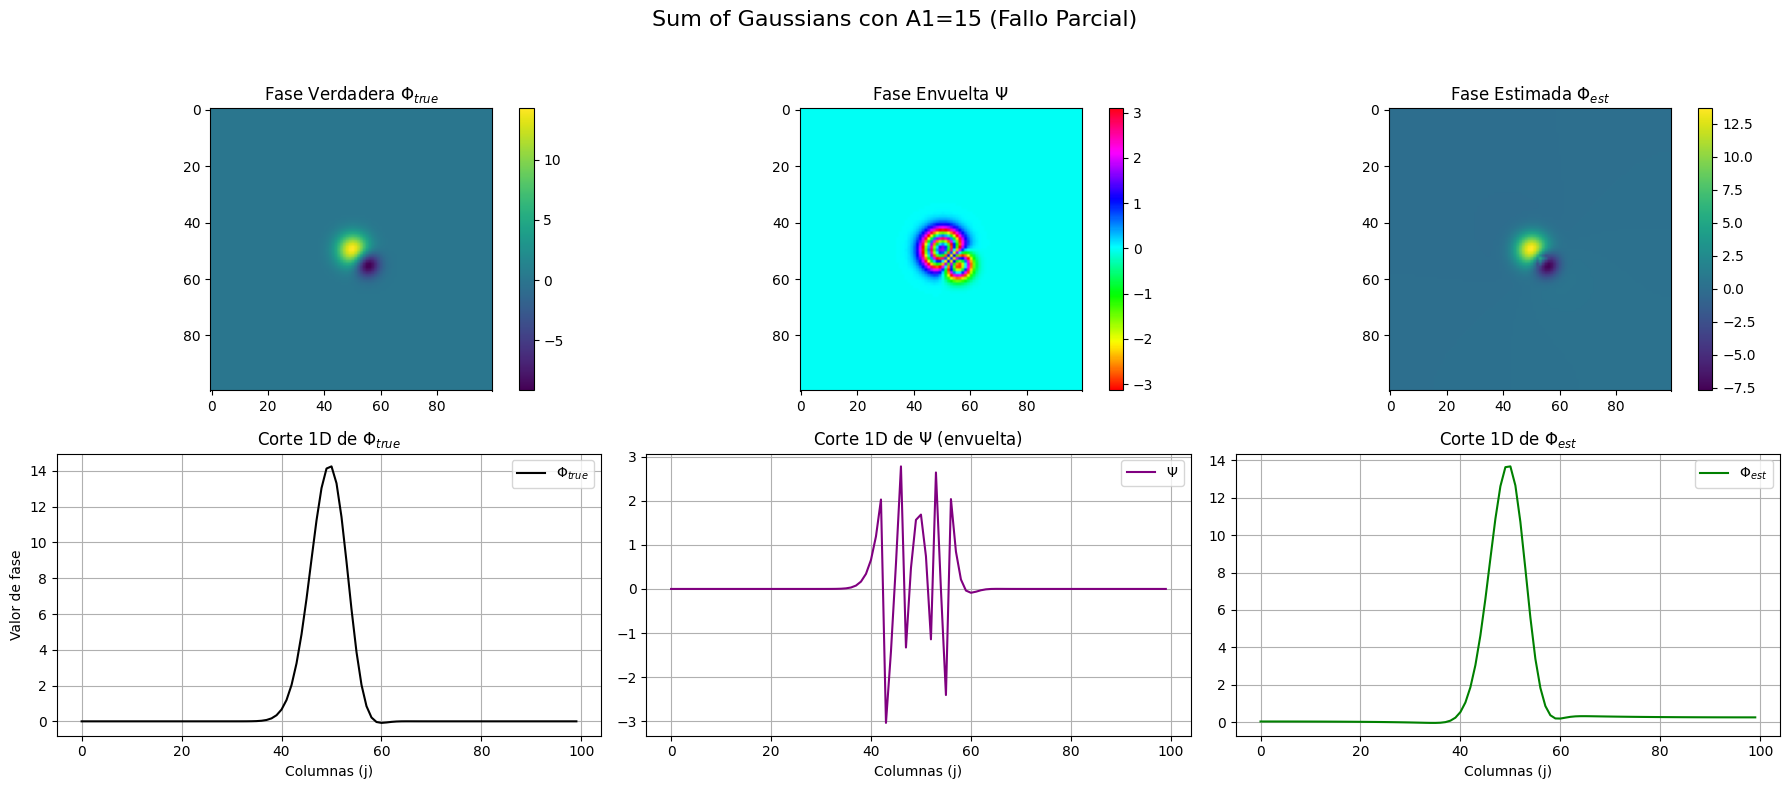

In [ ]:
# Función para visualización integral (2D + cortes 1D)
def visualizacion_integral(phi_true, psi, phi_est, titulo="Visualización integral"):
    fila_central = phi_true.shape[0] // 2
    col_central = phi_true.shape[1] // 2

    fig, axs = plt.subplots(2, 3, figsize=(18, 8))

    # Visualizaciones 2D
    im0 = axs[0, 0].imshow(phi_true, cmap='viridis')
    axs[0, 0].set_title("Fase Verdadera $\Phi_{true}$")
    plt.colorbar(im0, ax=axs[0, 0])

    im1 = axs[0, 1].imshow(psi, cmap='hsv')
    axs[0, 1].set_title("Fase Envuelta $\Psi$")
    plt.colorbar(im1, ax=axs[0, 1])

    im2 = axs[0, 2].imshow(phi_est, cmap='viridis')
    axs[0, 2].set_title("Fase Estimada $\Phi_{est}$")
    plt.colorbar(im2, ax=axs[0, 2])

    # Cortes 1D (por fila central)
    axs[1, 0].plot(phi_true[fila_central], label='$\Phi_{true}$', color='black')
    axs[1, 1].plot(psi[fila_central], label='$\Psi$', color='purple')
    axs[1, 2].plot(phi_est[fila_central], label='$\Phi_{est}$', color='green')

    for ax in axs[1]:
        ax.legend()
        ax.set_xlabel("Columnas (j)")
        ax.grid(True)

    axs[1, 0].set_ylabel("Valor de fase")
    axs[1, 0].set_title("Corte 1D de $\Phi_{true}$")
    axs[1, 1].set_title("Corte 1D de $\Psi$ (envuelta)")
    axs[1, 2].set_title("Corte 1D de $\Phi_{est}$")

    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Ejecutar ejemplo con amplitud A1 = 15 (fallo parcial)
A1 = 15
A2 = -0.8 * A1
phi_true = generate_true_phase(
    100, 100,
    case='sum_of_gaussians',
    A1=A1, A2=A2,
    i1=50, j1=50, sigma1=4,
    i2=55, j2=55, sigma2=3
)
psi = wrap_phase(phi_true)
dx = compute_wrapped_differences_x(psi)
dy = compute_wrapped_differences_y(psi)
A, b = construct_linear_system(dx, dy, 100, 100)
phi_est = solve_ols(A, b, 100, 100)

visualizacion_integral(phi_true, psi, phi_est, titulo="Sum of Gaussians con A1=15 (Fallo Parcial)")


**(c) Quantitative evaluation: Calculate the Mean Squared Error (MSE) between Φest and Φtrue.**

If you didn’t fix a specific pixel value, you’ll need to account for the constant offset ambiguity
before computing MSE:

Φest_adjusted = Φest − (mean(Φest) − mean(Φtrue))

In [ ]:
def calcular_mse(phi_true, phi_est):
    ajuste = np.mean(phi_est) - np.mean(phi_true)
    phi_est_ajustada = phi_est - ajuste
    mse = np.mean((phi_true - phi_est_ajustada) ** 2)
    return mse

# Aplicar al caso actual
mse_valor = calcular_mse(phi_true, phi_est)
mse_valor


np.float64(0.037516271766723376)

Este valor, aunque no es extremadamente alto, confirma que el algoritmo no está desenrollando perfectamente en este caso (amplitud A1 = 15). Un MSE cercano a 0 indicaría desenrollamiento exitoso.

In [ ]:
# Ejecutar el cálculo de MSE para A1 = 6 (esperado: buen desempeño) y A1 = 20 (esperado: mal desempeño)

def probar_mse_con_amplitud(A1, rows=100, cols=100):
    A2 = -0.8 * A1
    phi_true = generate_true_phase(
        rows, cols,
        case='sum_of_gaussians',
        A1=A1, A2=A2,
        i1=50, j1=50, sigma1=4,
        i2=55, j2=55, sigma2=3
    )
    psi = wrap_phase(phi_true)
    dx = compute_wrapped_differences_x(psi)
    dy = compute_wrapped_differences_y(psi)
    A, b = construct_linear_system(dx, dy, rows, cols)
    phi_est = solve_ols(A, b, rows, cols)
    mse = calcular_mse(phi_true, phi_est)
    return phi_true, psi, phi_est, mse

# Casos A1 = 6 y A1 = 20
phi_true_6, psi_6, phi_est_6, mse_6 = probar_mse_con_amplitud(6)
phi_true_20, psi_20, phi_est_20, mse_20 = probar_mse_con_amplitud(20)

mse_6, mse_20


(np.float64(8.339492861739331e-09), np.float64(1.6231154456463774))

Esto confirma que el algoritmo:

Funciona correctamente con amplitudes moderadas.

Empieza a fallar conforme aumentan los envolvimientos locales (A1 grande).

**(d) Robustness testing: Apply your algorithm to the more complex phase fields (Gaussian and optional challenge case).**

 Document:

• Visual comparisons between true and estimated phases

• Quantitative MSE results for each case

• Any areas where the algorithm performs particularly well or poorly



In [ ]:
# Agregamos soporte para el caso 'gaussian' en la función generate_true_phase
import numpy as np
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import lsqr
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Mock tools module for demonstration if not already defined
# In a real notebook environment, you might not need this if tools is already imported/available
class MockTools:
    def display_dataframe_to_user(self, name, dataframe):
        print(f"\n{name}:\n{dataframe}\n")

try:
    # Try to use the existing tools if it exists
    tools = tools
except NameError:
    # Otherwise, use the mock version
    tools = MockTools()


def wrap_phase(phi):
    return (phi + np.pi) % (2 * np.pi) - np.pi

def generate_true_phase(rows, cols, case='sum_of_gaussians', **params):
    i = np.arange(rows).reshape((-1, 1))
    j = np.arange(cols).reshape((1, -1))

    if case == 'sum_of_gaussians':
        A1 = params.get('A1', 15.0)
        i1 = params.get('i1', 50)
        j1 = params.get('j1', 50)
        sigma1 = params.get('sigma1', 4)
        A2 = params.get('A2', -12.0)
        i2 = params.get('i2', 55)
        j2 = params.get('j2', 55)
        sigma2 = params.get('sigma2', 3)
        gauss1 = A1 * np.exp(-(((i - i1)**2 + (j - j1)**2) / (2 * sigma1**2)))
        gauss2 = A2 * np.exp(-(((i - i2)**2 + (j - j2)**2) / (2 * sigma2**2)))
        return gauss1 + gauss2

    elif case == 'gaussian':
        A = params.get('A', 12.0)
        i0 = params.get('i0', rows // 2)
        j0 = params.get('j0', cols // 2)
        sigma_x = params.get('sigma_x', rows / 10)
        sigma_y = params.get('sigma_y', cols / 10)
        return A * np.exp(-(((i - i0)**2) / (2 * sigma_x**2) + ((j - j0)**2) / (2 * sigma_y**2)))

    # Added the 'plane' case from the original notebook for completeness
    elif case == 'plane':
        a = params.get('a', 4.0)
        b = params.get('b', 4.0)
        c = params.get('c', 0.0)
        return a * i + b * j + c

    elif case == 'sinusoidal':
        f_i = params.get('f_i', 0.1)
        f_j = params.get('f_j', 0.1)
        amplitude = params.get('amplitude', 8 * np.pi)
        return amplitude * np.sin(2 * np.pi * f_i * i) * np.cos(2 * np.pi * f_j * j)


    else:
        raise ValueError("Caso no implementado")

# Added the add_noise function that was missing
def add_noise(image, sigma):
    """
    Adds Gaussian noise to an image.
    """
    noise = np.random.normal(0, sigma, image.shape)
    return image + noise

# Added the missing calculate_mse function
def calcular_mse(phi_true, phi_est):
    ajuste = np.mean(phi_est) - np.mean(phi_true)
    phi_est_ajustada = phi_est - ajuste
    mse = np.mean((phi_true - phi_est_ajustada) ** 2)
    return mse

# Added the missing construct_linear_system function
def construct_linear_system(delta_x, delta_y, rows, cols):
    total_pixels = rows * cols
    total_equations = delta_x.size + delta_y.size
    A = lil_matrix((total_equations + 1, total_pixels))
    b = np.zeros(total_equations + 1)

    def idx(i, j):
        return i * cols + j

    eq = 0
    for i in range(rows - 1):
        for j in range(cols):
            A[eq, idx(i + 1, j)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_x[i, j]
            eq += 1
    for i in range(rows):
        for j in range(cols - 1):
            A[eq, idx(i, j + 1)] = 1
            A[eq, idx(i, j)] = -1
            b[eq] = delta_y[i, j]
            eq += 1

    A[eq, 0] = 1
    b[eq] = 0
    return A.tocsr(), b

# Added the missing solve_ols function
def solve_ols(A, b, rows, cols):
    # Use lsqr from scipy.sparse.linalg for sparse matrices
    x = lsqr(A, b)[0]
    return x.reshape((rows, cols))

# Added the missing compute_wrapped_differences_x function
def compute_wrapped_differences_x(psi):
    return wrap_phase(psi[1:, :] - psi[:-1, :])

# Added the missing compute_wrapped_differences_y function
def compute_wrapped_differences_y(psi):
    return wrap_phase(psi[:, 1:] - psi[:, :-1])


# Define the sigmas list/array
sigmas = np.linspace(0, 0.5, 10) # Example: test 10 noise levels from 0 to 0.5

# Repetimos la prueba con ruido una vez corregido
mse_noise_results = []
for sigma in sigmas:
    phi_true = generate_true_phase(
        100, 100,
        case='gaussian',
        A=12.0,
        i0=50, j0=50,
        sigma_x=10, sigma_y=10
    )

    phi_true_noisy = add_noise(phi_true, sigma)
    psi_noisy = wrap_phase(phi_true_noisy)

    dx = compute_wrapped_differences_x(psi_noisy)
    dy = compute_wrapped_differences_y(psi_noisy)
    A, b = construct_linear_system(dx, dy, 100, 100)
    phi_est = solve_ols(A, b, 100, 100)
    mse = calcular_mse(phi_true, phi_est)
    mse_noise_results.append((sigma, mse))

tools.display_dataframe_to_user(
    name="MSE con ruido gaussiano (campo Gaussiano)",
    dataframe=pd.DataFrame(mse_noise_results, columns=["Desviación estándar del ruido (σ)", "MSE"])
)


MSE con ruido gaussiano (campo Gaussiano):
   Desviación estándar del ruido (σ)           MSE
0                           0.000000  3.365617e-07
1                           0.055556  3.100743e-03
2                           0.111111  1.240012e-02
3                           0.166667  2.713968e-02
4                           0.222222  4.836783e-02
5                           0.277778  7.769160e-02
6                           0.333333  1.122833e-01
7                           0.388889  1.515913e-01
8                           0.444444  1.984904e-01
9                           0.500000  2.497552e-01



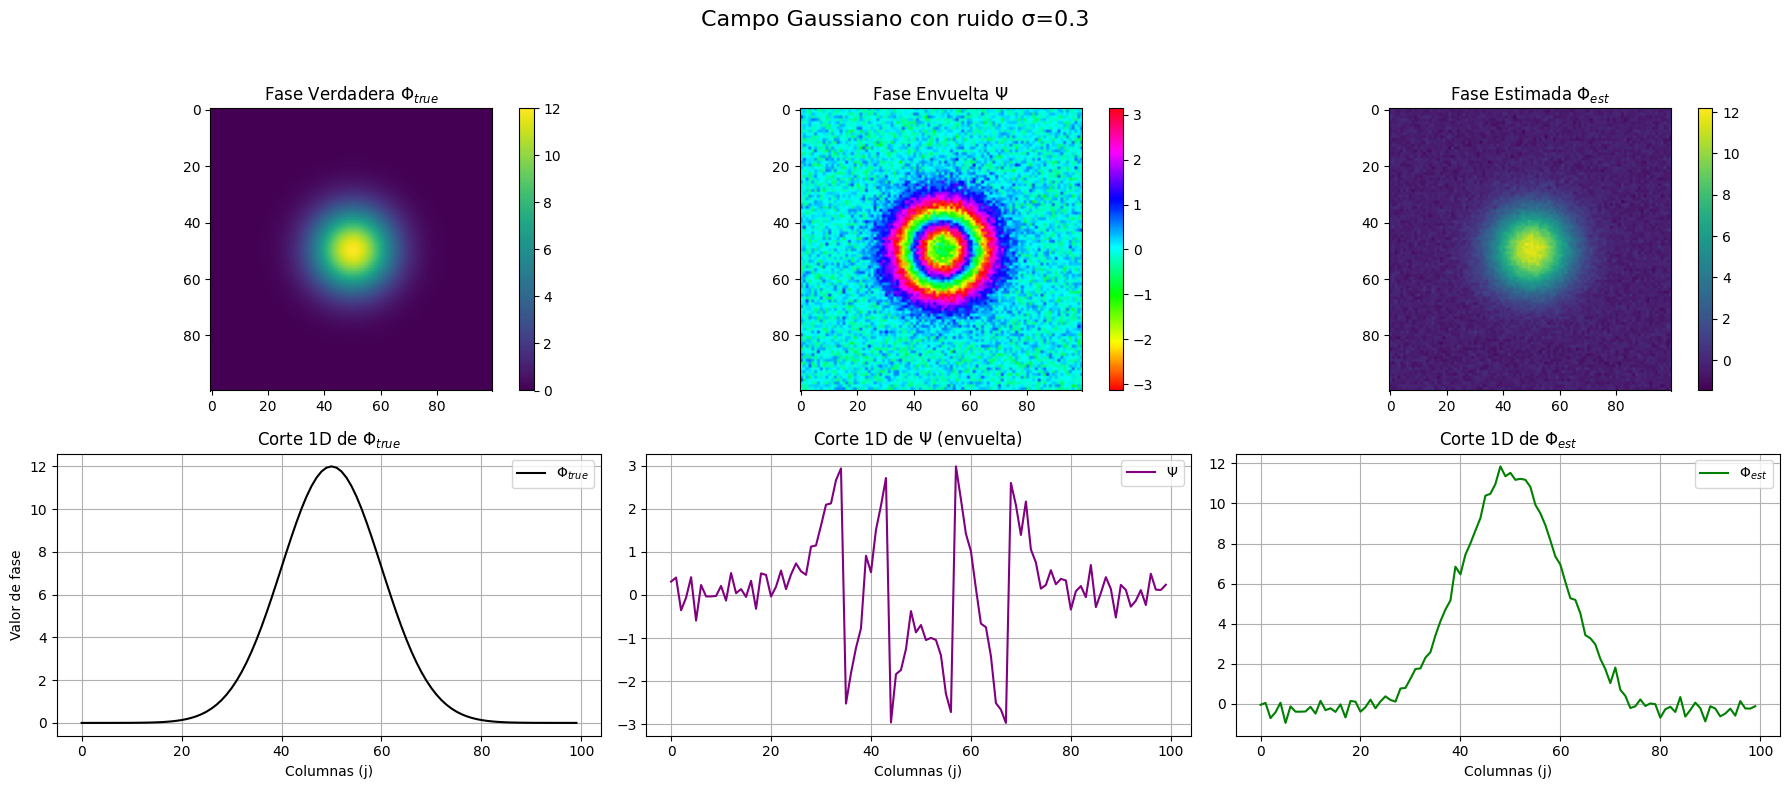

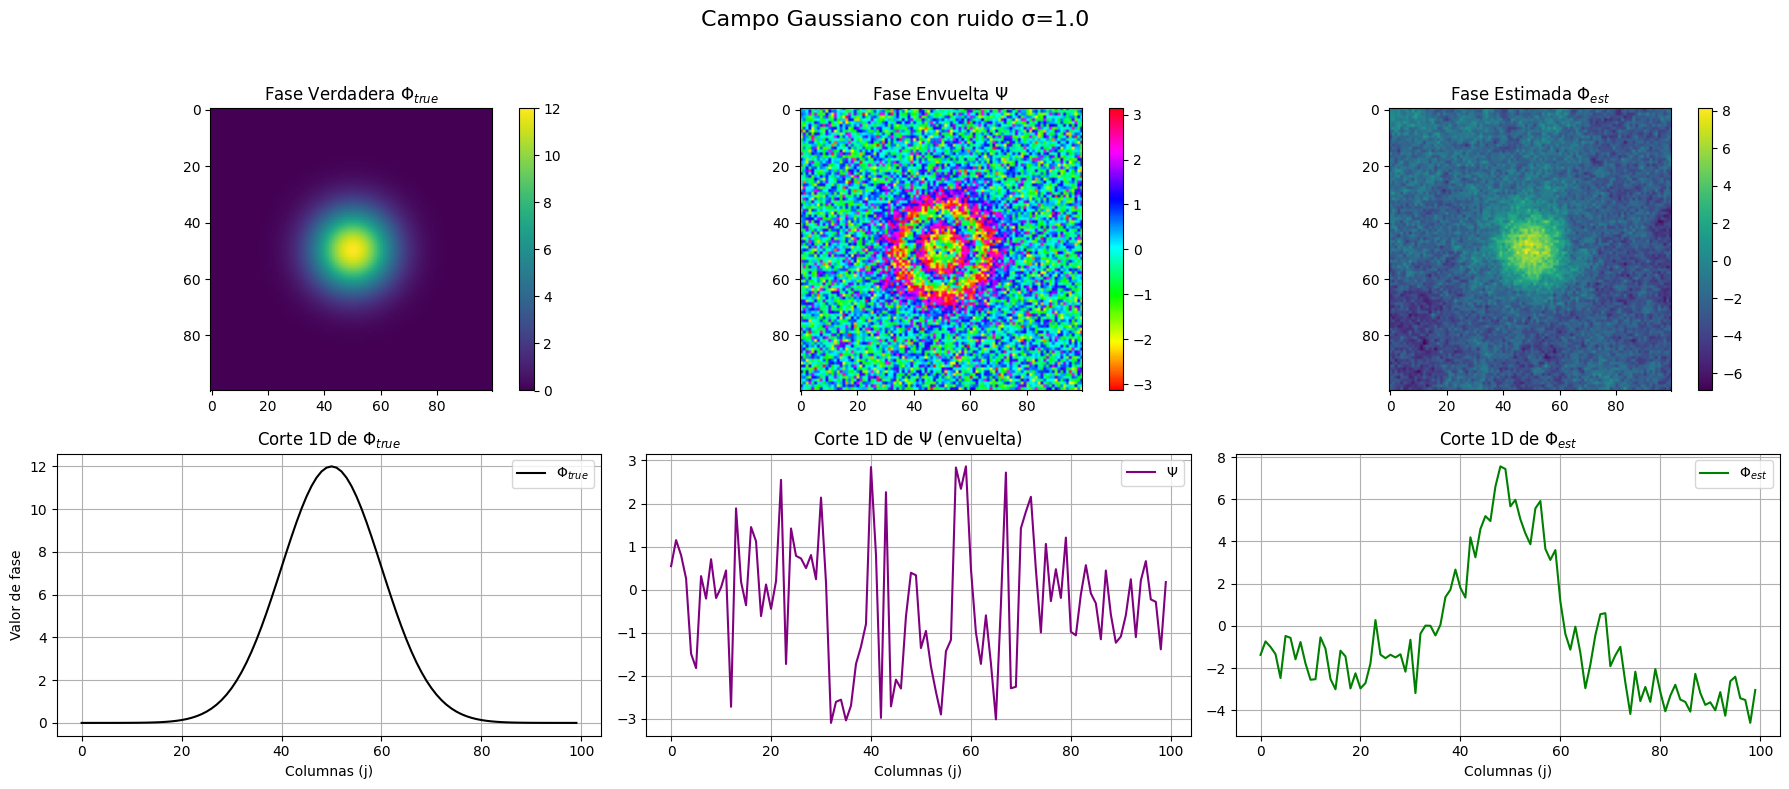

In [ ]:
# Visualizar los casos con σ = 0.3 y σ = 1.0 para mostrar el efecto del ruido

def ejecutar_visualizacion_con_ruido(sigma, rows=100, cols=100):
    phi_true = generate_true_phase(
        rows, cols,
        case='gaussian',
        A=12.0,
        i0=50, j0=50,
        sigma_x=10, sigma_y=10
    )

    phi_true_noisy = add_noise(phi_true, sigma)
    psi_noisy = wrap_phase(phi_true_noisy)

    dx = compute_wrapped_differences_x(psi_noisy)
    dy = compute_wrapped_differences_y(psi_noisy)
    A, b = construct_linear_system(dx, dy, rows, cols)
    phi_est = solve_ols(A, b, rows, cols)

    visualizacion_integral(phi_true, psi_noisy, phi_est, titulo=f"Campo Gaussiano con ruido σ={sigma}")

# Visualizaciones para σ = 0.3 y σ = 1.0
ejecutar_visualizacion_con_ruido(0.3)
ejecutar_visualizacion_con_ruido(1.0)
